In [1]:
import pandas as pd

data1 = pd.read_csv("/Users/visionwang/Documents/courses/Fall-22/Healthcare/final-project/hr-max-data/data1.csv")
data2 = pd.read_csv("/Users/visionwang/Documents/courses/Fall-22/Healthcare/final-project/hr-max-data/data2.csv")

In [2]:
data1.head(5)

Unnamed: 0  day_pos            date_time        date_time_exp  sent_num  \
0           0        1  2016-05-10 07:36:17  2016-05-10 07:30:00        -1   
1           1        2  2016-05-10 08:17:35  2016-05-10 08:15:00         1   
2           2        3  2016-05-10 09:04:16  2016-05-10 09:00:00         1   
3           3        4  2016-05-10 09:46:34  2016-05-10 09:45:00         1   
4           4        5  2016-05-10 10:31:37  2016-05-10 10:30:00        -1   

                                                text     hr  Happy  Angry  \
0  Morning woke up was tough. I would most likely...    NaN    0.0   0.00   
1  Walk to train station wasn't so bad and hurry ...  107.0    0.0   0.50   
2  What a good status. We were laughing a colleag...  105.0    0.0   0.00   
3  Redrawing the design description diagram. It's...  108.0    0.0   0.00   
4  Working and my wife disturbs me with her resea...   92.0    0.0   0.67   

   Surprise  Sad  Fear  
0       0.0  0.0  1.00  
1       0.0  0.0  0.50  
2       0.0  0.0  0.00  
3       0.5  0.0  0.50  
4       0.0  0.0  0.33

In [6]:
data1[["text", "hr"]]

text     hr
0     Morning woke up was tough. I would most likely...    NaN
1     Walk to train station wasn't so bad and hurry ...  107.0
2     What a good status. We were laughing a colleag...  105.0
3     Redrawing the design description diagram. It's...  108.0
4     Working and my wife disturbs me with her resea...   92.0
...                                                 ...    ...
1024  We are searching for movie or TV show which we...  120.0
1025  Watching Orange is the New Black and relaxing ...  104.0
1026  Improving my research about fitness bands and ...   97.0
1027  I need to finish some work remotely and also p...   96.0
1028  And with this last tweet ever I am happy that ...  103.0

[1029 rows x 2 columns]

In [3]:
data2.head(5)

Unnamed: 0  day_pos            date_time        date_time_exp  sent_num  \
0           0        1  2016-08-15 10:01:24  2016-08-15 09:45:00        -1   
1           1        2  2016-08-15 10:52:51  2016-08-15 10:30:00        -1   
2           2        3  2016-08-15 11:18:46  2016-08-15 11:15:00         1   
3           3        4  2016-08-15 12:00:53  2016-08-15 12:00:00         1   
4           4        5  2016-08-15 12:59:39  2016-08-15 12:45:00         1   

                                                text     hr  Happy  Angry  \
0  Starting week after vacation is terrible espec...  101.0   0.25    0.0   
1  Organizing last sprint close and new sprint es...  129.0   0.25    0.0   
2  Sitting at the meeting. It wasn't bad, but ret...  118.0   0.33    0.0   
3  Finally I am working on something which is rea...  100.0   0.00    0.0   
4  We had a passionate discussion about not so mu...  105.0   0.50    0.0   

   Surprise  Sad  Fear  
0      0.00  0.0  0.75  
1      0.00  0.0  0.75  
2      0.00  0.0  0.67  
3      0.00  0.0  1.00  
4      0.25  0.0  0.25

In [5]:
data1.shape[0]+data2.shape[0]

2046

In [295]:
data1 = data1[["text", "hr"]]
data2 = data2[["text", "hr"]]
data = pd.concat([data1, data2]).dropna().reset_index(drop=True)
data

text     hr
0     Walk to train station wasn't so bad and hurry ...  107.0
1     What a good status. We were laughing a colleag...  105.0
2     Redrawing the design description diagram. It's...  108.0
3     Working and my wife disturbs me with her resea...   92.0
4     Finishing drawing and looking forward for lunc...   99.0
...                                                 ...    ...
2035  Really interesting plot of first episode of #W...  111.0
2036  Returned to watching good old #Narcos. Because...   95.0
2037  @duolingo surprised me today by the new app #t...   96.0
2038  I am already in the bed ready to go sleep. Tir...   91.0
2039  Tomorrow I need to work on my PhD stuff during...   92.0

[2040 rows x 2 columns]

In [296]:
import numpy as np 
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/visionwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [297]:
# filtering and cleaning
def process_comment(text):
    #Remove www.* or https?://*
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))\s+','',text)
    text = re.sub('\s+((www\.[^\s]+)|(https?://[^\s]+))','',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    #Remove @username
    #text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub('#[^\s]+','',text)
     # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    #Remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
    #Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.lower().strip()
    return text

data["Cleaned_text"] = data["text"].apply(lambda x: process_comment(x))
data

text     hr  \
0     Walk to train station wasn't so bad and hurry ...  107.0   
1     What a good status. We were laughing a colleag...  105.0   
2     Redrawing the design description diagram. It's...  108.0   
3     Working and my wife disturbs me with her resea...   92.0   
4     Finishing drawing and looking forward for lunc...   99.0   
...                                                 ...    ...   
2035  Really interesting plot of first episode of #W...  111.0   
2036  Returned to watching good old #Narcos. Because...   95.0   
2037  @duolingo surprised me today by the new app #t...   96.0   
2038  I am already in the bed ready to go sleep. Tir...   91.0   
2039  Tomorrow I need to work on my PhD stuff during...   92.0   

                                           Cleaned_text  
0     walk to train station was not so bad and hurry...  
1     what a good status we were laughing a colleagu...  
2     redrawing the design description diagram it is...  
3     working and my wife disturbs me with her resea...  
4     finishing drawing and looking forward for lunc...  
...                                                 ...  
2035  really interesting plot of first episode of ro...  
2036  returned to watching good old because we know ...  
2037  surprised me today by the new app i would use ...  
2038  i am already in the bed ready to go sleep tire...  
2039  tomorrow i need to work on my phd stuff during...  

[2040 rows x 3 columns]

In [298]:
data["hr"].values
min_value = min(list(data["hr"].values))
max_value = max(list(data["hr"].values))
data['nor_hr'] = (data["hr"].values - min_value)/(max_value - min_value)
data

text     hr  \
0     Walk to train station wasn't so bad and hurry ...  107.0   
1     What a good status. We were laughing a colleag...  105.0   
2     Redrawing the design description diagram. It's...  108.0   
3     Working and my wife disturbs me with her resea...   92.0   
4     Finishing drawing and looking forward for lunc...   99.0   
...                                                 ...    ...   
2035  Really interesting plot of first episode of #W...  111.0   
2036  Returned to watching good old #Narcos. Because...   95.0   
2037  @duolingo surprised me today by the new app #t...   96.0   
2038  I am already in the bed ready to go sleep. Tir...   91.0   
2039  Tomorrow I need to work on my PhD stuff during...   92.0   

                                           Cleaned_text    nor_hr  
0     walk to train station was not so bad and hurry...  0.354839  
1     what a good status we were laughing a colleagu...  0.338710  
2     redrawing the design description diagram it is...  0.362903  
3     working and my wife disturbs me with her resea...  0.233871  
4     finishing drawing and looking forward for lunc...  0.290323  
...                                                 ...       ...  
2035  really interesting plot of first episode of ro...  0.387097  
2036  returned to watching good old because we know ...  0.258065  
2037  surprised me today by the new app i would use ...  0.266129  
2038  i am already in the bed ready to go sleep tire...  0.225806  
2039  tomorrow i need to work on my phd stuff during...  0.233871  

[2040 rows x 4 columns]

In [85]:
data = data.loc[:100,:]
data

text     hr  \
0    Walk to train station wasn't so bad and hurry ...  107.0   
1    What a good status. We were laughing a colleag...  105.0   
2    Redrawing the design description diagram. It's...  108.0   
3    Working and my wife disturbs me with her resea...   92.0   
4    Finishing drawing and looking forward for lunc...   99.0   
..                                                 ...    ...   
96   Find a place to park a car in the shopping cen...  107.0   
97   Waiting in the line for taking foto with bear....   91.0   
98   Testing perfumes in Douglas we need to renew o...  104.0   
99   Paying the grocery and finally going home from...  117.0   
100  I just finished the storage of grocery into ki...  100.0   

                                          Cleaned_text    nor_hr  
0    walk to train station was not so bad and hurry...  0.354839  
1    what a good status we were laughing a colleagu...  0.338710  
2    redrawing the design description diagram it is...  0.362903  
3    working and my wife disturbs me with her resea...  0.233871  
4    finishing drawing and looking forward for lunc...  0.290323  
..                                                 ...       ...  
96   find a place to park a car in the shopping cen...  0.354839  
97   waiting in the line for taking foto with bear ...  0.225806  
98   testing perfumes in douglas we need to renew o...  0.330645  
99   paying the grocery and finally going home from...  0.435484  
100  i just finished the storage of grocery into ki...  0.298387  

[101 rows x 4 columns]

In [86]:
# divide into training and testing sets 

from sklearn.model_selection import train_test_split
y = data["nor_hr"].values
x_train,x_test,y_train,y_test = train_test_split(data.Cleaned_text,y,test_size=0.2, random_state=42, shuffle=True)

In [87]:
x_train

89    raspberries with white yogurt and hint of suga...
26    sitting on the meeting with explosive topic an...
42    my wife has blocked neck and thus terrible hea...
70    standing on standup meeting and listening to s...
15    enjoying dinner with my wife on balcony with k...
                            ...                        
60    helping colleague with overnight load of  tabl...
71    it is becoming funnier and funnier here anothe...
14    back at home going to prepare grill and relax ...
92    i need to sleep at least one hour more because...
51    busy with lunch and after explanation of situa...
Name: Cleaned_text, Length: 80, dtype: object

In [88]:
# create token list and node list

node_list = []
sent_list = []
for sentence in x_train:
    sent_token = sentence.lower().split()
    node_list.extend(sent_token)
    sent_list.append(sent_token)
print(len(node_list))
node_list = list(set(node_list))
print(len(node_list))

1823
620


In [299]:
len(data["Cleaned_text"])

2040

In [313]:
data["text"][:3][2]

"Redrawing the design description diagram. It's complex, but I like it, while it helps me to explain the problem to others. #p #xfb"

In [308]:
# create token list and node list

node_list = []
sent_list = []
for sentence in data["Cleaned_text"][:3]:
    sent_token = sentence.lower().split()
    node_list.extend(sent_token)
    sent_list.append(sent_token)
print(len(node_list))
node_list = list(set(node_list))
print(len(node_list))

70
51


In [243]:
len(sent_list)

80

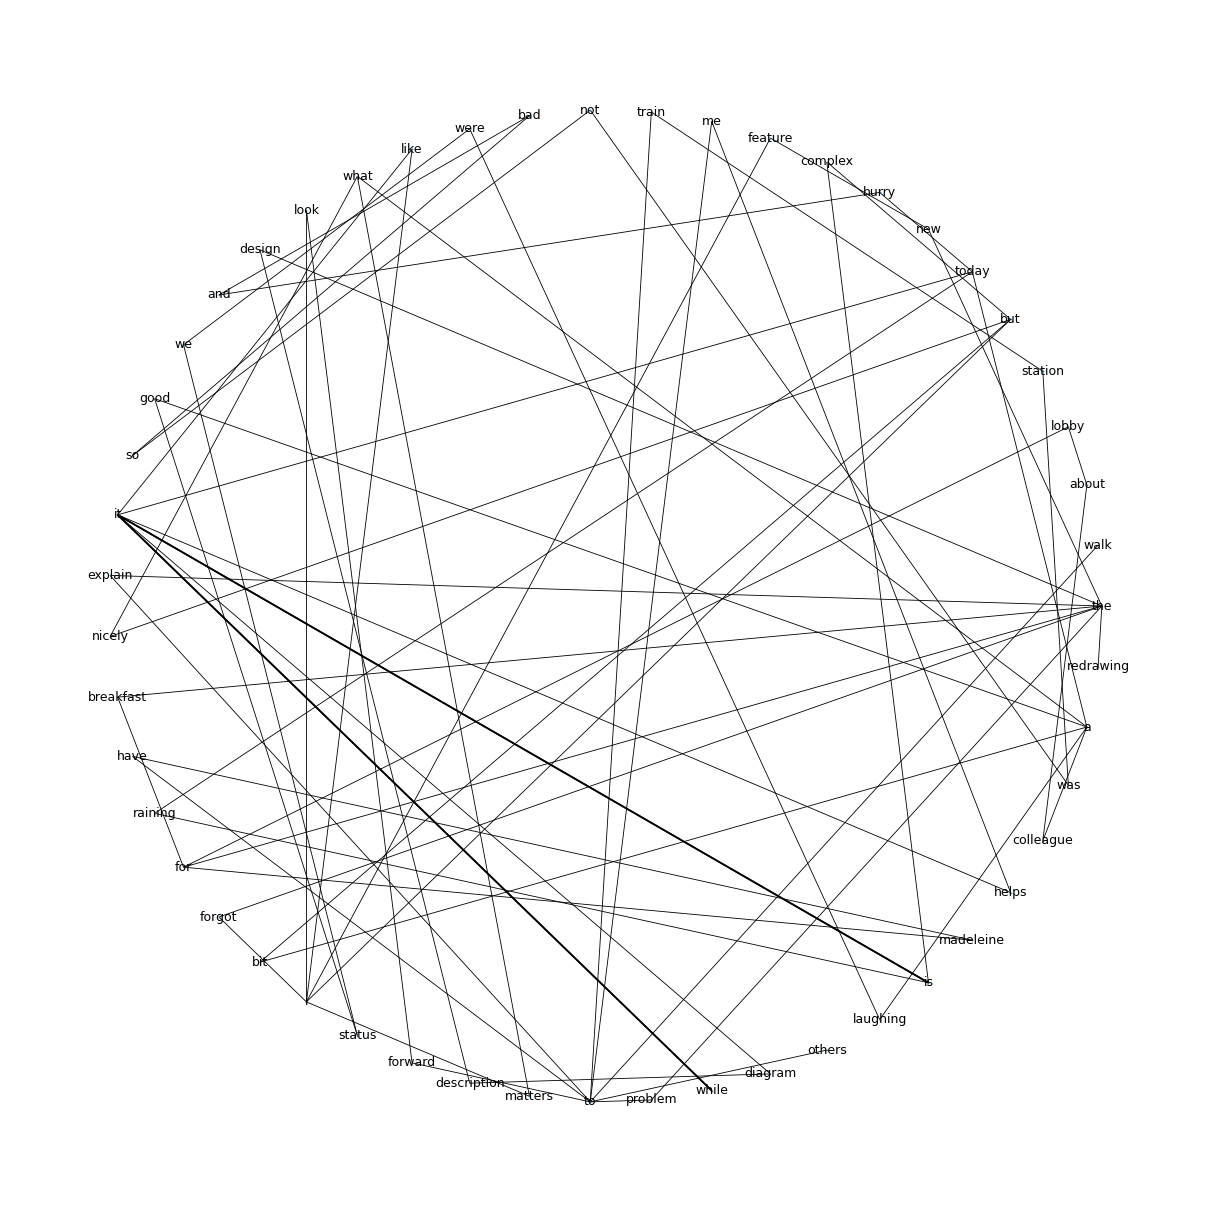

In [309]:
# create co-occurance graph
import networkx as nx

#G = nx.MultiDiGraph()
G = nx.MultiGraph()
G.add_nodes_from(node_list)
# add edges based on each sentence
for j in range(len(sent_list)):
    sent_token = sent_list[j]
    for i in range(len(sent_token)-1):
        G.add_edge(sent_token[i], sent_token[i+1])
pos = nx.circular_layout(G)
weights = [G.number_of_edges(u, v) for u,v in G.edges()]
#pos = nx.random_layout(G)
plt.figure(1, figsize=(20, 20), dpi=60)
nx.draw(G, with_labels = True, pos = pos, node_size =1, width=weights, font_size=15)
plt.savefig("co-occ-graph-sample.jpg", dpi=60)

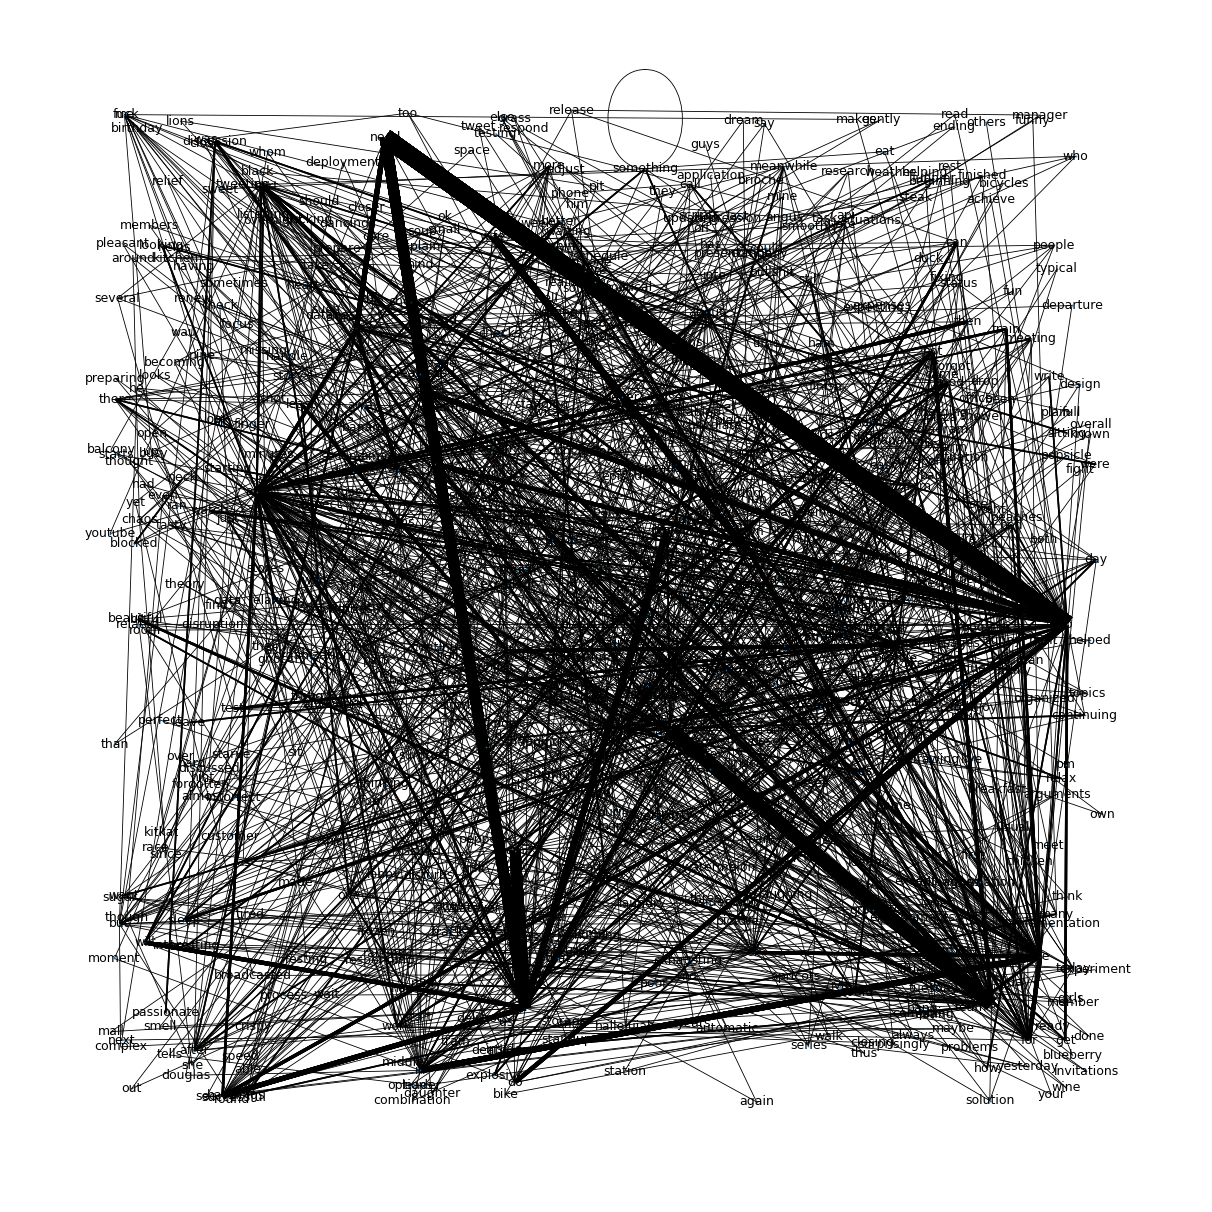

In [186]:
# create co-occurance graph
import networkx as nx

#G = nx.MultiDiGraph()
G = nx.MultiGraph()
G.add_nodes_from(node_list)
# add edges based on each sentence
for j in range(len(sent_list)):
    sent_token = sent_list[j]
    for i in range(len(sent_token)-1):
        G.add_edge(sent_token[i], sent_token[i+1])
pos = nx.random_layout(G)
weights = [G.number_of_edges(u, v) for u,v in G.edges()]
#pos = nx.random_layout(G)
plt.figure(1, figsize=(20, 20), dpi=60)
nx.draw(G, with_labels = True, pos = pos, node_size =1, width=weights, font_size=15)
plt.savefig("co-occ-graph-2.jpg", dpi=60)

In [125]:
# total degrees for all nodes
sum(list(dict(G.degree()).values()))

3486

In [126]:
# average degree
sum(list(dict(G.degree()).values())) / len(node_list)

5.622580645161291

In [111]:
dict(G.degree()).values

<built-in method values of dict object at 0x7fec8830ef00>


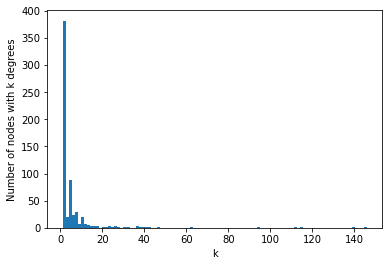

In [221]:
plt.hist(dict(G.degree()).values(), bins = 100)
plt.xlabel("k")
plt.ylabel("Number of nodes with k degrees")
plt.show()

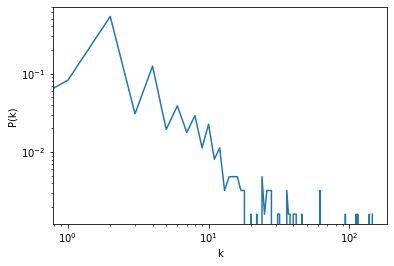

In [130]:
from pylab import *
import networkx as nx

n = len(node_list)
Pk = [float(x) / n for x in nx.degree_histogram(G)]
domain = range(len(Pk))
loglog(domain, Pk, '-',label = 'Linguistic Network')
xlabel('k')
ylabel('P(k)')
#legend()
show()

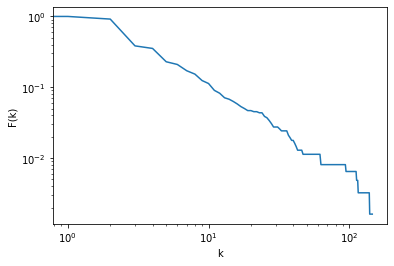

In [131]:
# plot complementary cumulative distribution function 

n = len(node_list)
Pk = [float(x) / n for x in nx.degree_histogram(G)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]
loglog(domain, ccdf, '-',label = 'Linguistic Network')
xlabel('k')
ylabel('F(k)')
#legend()
show()

Estimated CCDF: F(k) = 2.3623783749561156 * k^ -1.3378547753710446
r = -0.9916420229785649
p-value = 1.451708842938972e-42


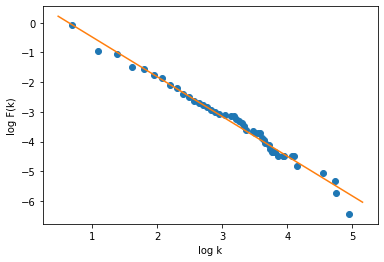

In [129]:
from scipy import stats as st
n = len(node_list)
Pk = [float(x) / n for x in nx.degree_histogram(G)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]

logkdata = []
logFdata = []
prevF = ccdf[0]
for k in domain:
    F = ccdf[k]
    if F != prevF:
        logkdata.append(log(k))
        logFdata.append(log(F))
        prevF = F
a, b, r, p, err = st.linregress(logkdata, logFdata)
print('Estimated CCDF: F(k) =', exp(b), '* k^', a)
print('r =', r)
print('p-value =', p)
plot(logkdata, logFdata, 'o')
kmin, kmax = xlim()
plot([kmin, kmax],[a * kmin + b, a * kmax + b])
xlabel('log k')
ylabel('log F(k)')
show()

In [188]:
len(list(G.edges()))

1743

In [190]:
edge_dict = Counter(G.edges())
edge_dict

Counter({('presentation', 'your'): 1,
         ('presentation', 'it'): 1,
         ('friday', 'for'): 1,
         ('friday', 'night'): 1,
         ('walk', 'or'): 1,
         ('walk', 'through'): 1,
         ('flyers', 'advertising'): 1,
         ('flyers', 'from'): 1,
         ('tired', 'get'): 1,
         ('tired', 'today'): 1,
         ('am', 'i'): 13,
         ('am', 'preparing'): 1,
         ('am', 'at'): 1,
         ('am', 'challenged'): 1,
         ('am', 'not'): 2,
         ('am', 'close'): 1,
         ('am', 'continuing'): 1,
         ('am', 'really'): 1,
         ('am', 'enjoying'): 1,
         ('am', 'late'): 1,
         ('am', 'little'): 1,
         ('am', 'searching'): 1,
         ('am', 'starting'): 1,
         ('hour', 'last'): 1,
         ('hour', 'of'): 1,
         ('hour', 'one'): 2,
         ('hour', 'to'): 1,
         ('hour', 'more'): 1,
         ('theory', 'bang'): 1,
         ('theory', 'for'): 1,
         ('clear', 'have'): 1,
         ('clear', 'mind'): 1,
    

In [226]:
#edge_count_ave = mean(list(dict(edge_dict).values()))
fil_edge = [i for i in list(dict(edge_dict).values()) if i > 1]
len(fil_edge)

169

In [209]:
node_list

['presentation',
 'friday',
 'walk',
 'flyers',
 'tired',
 'am',
 'hour',
 'theory',
 'clear',
 'there',
 'human',
 'reading',
 'hurry',
 'beginning',
 'seems',
 'ham',
 'live',
 'better',
 'manager',
 'find',
 'brioche',
 'terrible',
 'previous',
 'sweet',
 'leaving',
 'down',
 'gently',
 'wau',
 'bed',
 'surprise',
 'because',
 'everyone',
 'guess',
 'shopping',
 'breath',
 'crispy',
 'a',
 'now',
 'fun',
 'beautiful',
 'overnight',
 'neck',
 'came',
 'sitting',
 'apricots',
 'used',
 'even',
 'if',
 'enjoying',
 'best',
 'wine',
 'funnier',
 'pizza',
 'and',
 'kitchen',
 'research',
 'go',
 'race',
 'breakfast',
 'steak',
 'lions',
 'easy',
 'bit',
 'from',
 'stress',
 'to',
 'has',
 'would',
 'too',
 'faster',
 'party',
 'always',
 'helps',
 'sign',
 'solving',
 'complain',
 'loaded',
 'still',
 'gnocchi',
 'thought',
 'nothing',
 'overall',
 'tram',
 'difficult',
 'topic',
 'political',
 'me',
 'nine',
 'disruption',
 'soup',
 'then',
 'part',
 'implementation',
 'big',
 'brooklyn

In [90]:
# create co-occurance matrix 
import numpy as np

co_oc_list = []
for node_i in list(G.nodes()):
    item = []
    for node_j in list(G.nodes()):
        item.append(G.number_of_edges(node_i, node_j))
    co_oc_list.append(item)
co_oc_arr = np.array(co_oc_list)
print(co_oc_arr.shape)

(620, 620)


In [91]:
co_oc_list

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [215]:
from collections import Counter
node_dict = dict(G.degree)
node_dict

{'presentation': 2,
 'friday': 2,
 'walk': 2,
 'flyers': 2,
 'tired': 2,
 'am': 26,
 'hour': 6,
 'theory': 2,
 'clear': 2,
 'there': 13,
 'human': 2,
 'reading': 2,
 'hurry': 2,
 'beginning': 2,
 'seems': 4,
 'ham': 2,
 'live': 2,
 'better': 11,
 'manager': 2,
 'find': 1,
 'brioche': 2,
 'terrible': 3,
 'previous': 2,
 'sweet': 3,
 'leaving': 3,
 'down': 2,
 'gently': 2,
 'wau': 1,
 'bed': 10,
 'surprise': 2,
 'because': 2,
 'everyone': 1,
 'guess': 2,
 'shopping': 5,
 'breath': 1,
 'crispy': 2,
 'a': 24,
 'now': 4,
 'fun': 2,
 'beautiful': 1,
 'overnight': 2,
 'neck': 4,
 'came': 2,
 'sitting': 3,
 'apricots': 2,
 'used': 2,
 'even': 4,
 'if': 8,
 'enjoying': 5,
 'best': 4,
 'wine': 2,
 'funnier': 4,
 'pizza': 7,
 'and': 139,
 'kitchen': 2,
 'research': 4,
 'go': 18,
 'race': 2,
 'breakfast': 3,
 'steak': 2,
 'lions': 2,
 'easy': 4,
 'bit': 8,
 'from': 27,
 'stress': 2,
 'to': 146,
 'has': 6,
 'would': 10,
 'too': 4,
 'faster': 2,
 'party': 2,
 'always': 2,
 'helps': 3,
 'sign': 1,
 '

In [216]:
node_count_ave = mean(list(dict(node_dict).values()))
node_count_ave

5.622580645161291

In [224]:
fil_node = [i for i in list(dict(node_dict).values()) if i > 2]
len(fil_node)

238

In [225]:
620-238

382

In [266]:
# prepare context list: node embedding + edge embedding
edge_pair = list(set(G.edges()))
print("Total edges: ", len(edge_pair))
node_list = list(set(G.nodes))
print("Total nodes: ", len(node_list))
edge_count_ave = mean(list(dict(edge_dict).values()))
print("Ave edge degree: ", edge_count_ave)
node_count_ave = mean(list(dict(node_dict).values()))
print("Ave node degree: ", node_count_ave)

fil_edge = [i for i in list(dict(edge_dict).values()) if i > 1]
print("filtered edge: ",len(fil_edge))
fil_node = [i for i in list(dict(node_dict).values()) if i > 2]
print("filtered node: ",len(fil_node))

Total edges:  1428
Total nodes:  620
Ave edge degree:  1.2205882352941178
Ave node degree:  5.622580645161291
filtered edge:  169
filtered node:  238


In [264]:
def filter_node_function(pair):
    key, value = pair
    if value > 2:
        return True  
    else:
        return False  
 
filtered_nodes = list(dict(filter(filter_node_function, dict(node_dict).items())).keys())
print(filtered_nodes)

['am', 'hour', 'there', 'seems', 'better', 'terrible', 'sweet', 'leaving', 'bed', 'shopping', 'a', 'now', 'neck', 'sitting', 'even', 'if', 'enjoying', 'best', 'funnier', 'pizza', 'and', 'research', 'go', 'breakfast', 'easy', 'bit', 'from', 'to', 'has', 'would', 'too', 'helps', 'still', 'nothing', 'difficult', 'topic', 'me', 'then', 'big', 'brooklyn', 'will', 'questions', 'tasty', 'back', 'who', 'sleep', 'project', 'hope', 'this', 'headache', 'problem', 'no', 'morning', 'day', 'not', 'were', 'look', 'it', 'tv', 'raining', 'just', 'status', 'right', 'let', 'solved', 'us', 'one', 'watermelon', 'series', 'solution', 'chaos', 'desert', 'much', 'kids', 'on', 'really', 'here', 'listening', 'about', 'interesting', 'through', 'explosive', 'topics', 'today', 'data', 'waiting', 'any', 'going', 'maybe', 'small', 'database', 'movie', 'episode', 'inside', 'team', 'relax', 'such', 'watching', 'other', 'before', 'slowly', 'into', 'looking', 'some', 'have', 'grocery', 'write', 'nice', 'do', 'rainy', 'p

In [270]:
def filter_edge_function(pair):
    key, value = pair
    if value > 1:
        return True  # keep pair in the filtered dictionary
    else:
        return False  # filter pair out of the dictionary

filtered_edges = list(dict(filter(filter_edge_function, dict(edge_dict).items())).keys())
filtered_edges

[('am', 'i'),
 ('am', 'not'),
 ('hour', 'one'),
 ('there', 'is'),
 ('there', 'are'),
 ('better', 'be'),
 ('better', 'and'),
 ('bed', 'to'),
 ('bed', 'the'),
 ('bed', 'after'),
 ('a', 'what'),
 ('neck', 'blocked'),
 ('sitting', 'on'),
 ('funnier', 'and'),
 ('and', 'it'),
 ('and', 'meeting'),
 ('and', 'listening'),
 ('and', 'more'),
 ('and', 'we'),
 ('and', 'lunch'),
 ('and', 'relax'),
 ('and', 'have'),
 ('and', 'on'),
 ('and', 'show'),
 ('and', 'relaxing'),
 ('and', 'then'),
 ('and', 'finally'),
 ('and', 'what'),
 ('and', 'something'),
 ('and', 'watermelon'),
 ('and', 'i'),
 ('and', 'train'),
 ('and', 'looking'),
 ('and', 'pepper'),
 ('and', 'strawberries'),
 ('go', 'to'),
 ('go', 'home'),
 ('go', 'will'),
 ('breakfast', 'for'),
 ('bit', 'little'),
 ('from', 'the'),
 ('to', 'what'),
 ('to', 'watch'),
 ('to', 'how'),
 ('to', 'get'),
 ('to', 'need'),
 ('to', 'keep'),
 ('to', 'starting'),
 ('to', 'take'),
 ('to', 'sleep'),
 ('to', 'want'),
 ('to', 'care'),
 ('to', 'the'),
 ('to', 'work'),


In [271]:
context_list = [filtered_nodes, filtered_edges] 

In [240]:
x_train.shape

(80,)

In [272]:
# create term-document co-occurance matrix 
all_cooc = []
for n_doc in range(80):
    doc_cooc = []
    sent_token = sent_list[n_doc]
    for i in range(len(context_list)): 
        if i == 0: # node embedding
            for node in context_list[i]:
                doc_cooc.append(sent_token.count(node))
        else: # edge embedding 
            for edge_pare in context_list[i]:
                (u, v) = edge_pare
                count = 0
                for j in range(len(sent_token)-1):
                    if sent_token[j] == u and sent_token[j+1] == v:
                        count += 1
                doc_cooc.append(count)
    all_cooc.append(doc_cooc)
                
doc_cooc_arr = np.array(all_cooc)
print(doc_cooc_arr.shape)

(80, 407)


In [273]:
doc_cooc_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

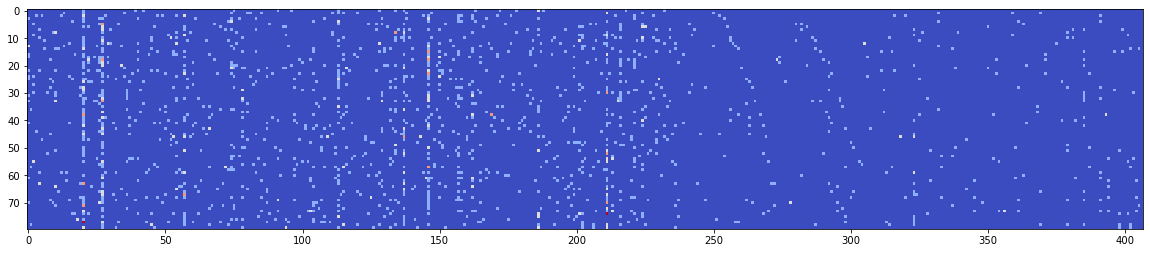

In [289]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))
plt.imshow(doc_cooc_arr, cmap='coolwarm', interpolation='nearest')
plt.show()

In [286]:
from sklearn.preprocessing import StandardScaler

FeatureScaler = StandardScaler()
FeatureScalerFit=FeatureScaler.fit(doc_cooc_arr)
nor_doc_cooc_arr=FeatureScalerFit.transform(doc_cooc_arr)
print(nor_doc_cooc_arr)

[[-0.40486853 -0.19738551 -0.270232   ... -0.19738551 -0.16012815
   0.        ]
 [-0.40486853 -0.19738551 -0.270232   ... -0.19738551 -0.16012815
   0.        ]
 [-0.40486853 -0.19738551 -0.270232   ... -0.19738551 -0.16012815
   0.        ]
 ...
 [-0.40486853 -0.19738551 -0.270232   ... -0.19738551 -0.16012815
   0.        ]
 [-0.40486853  5.06622805 -0.270232   ... -0.19738551 -0.16012815
   0.        ]
 [-0.40486853 -0.19738551 -0.270232   ... -0.19738551 -0.16012815
   0.        ]]


In [304]:
df_doc_cooc = pd.DataFrame(nor_doc_cooc_arr, columns=filtered_nodes+filtered_edges)
df_doc_cooc.head()

am      hour     there     seems    better  terrible     sweet  \
0 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
1 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
2 -0.404869 -0.197386 -0.270232  6.244998 -0.244137  6.244998 -0.160128   
3  2.086630 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
4 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   

    leaving       bed  shopping  ...  (of, colleague)  (of, the)  \
0 -0.160128 -0.258199 -0.197386  ...              0.0  -0.229416   
1 -0.160128 -0.258199 -0.197386  ...              0.0  -0.229416   
2 -0.160128 -0.258199 -0.197386  ...              0.0  -0.229416   
3 -0.160128 -0.258199 -0.197386  ...              0.0  -0.229416   
4 -0.160128 -0.258199 -0.197386  ...              0.0  -0.229416   

   (things, which)  (are, we)  (at, the)  (at, least)  (the, good)  \
0        -0.160128        0.0  -0.197386    -0.229416    -0.160128   
1        -0.160128        0.0  -0.197386    -0.229416    -0.160128   
2        -0.160128        0.0  -0.197386    -0.229416    -0.160128   
3        -0.160128        0.0  -0.197386    -0.229416    -0.160128   
4        -0.160128        0.0  -0.197386    -0.229416    -0.160128   

   (the, train)  (good, lunch)  (need, we)  
0     -0.197386      -0.160128         0.0  
1     -0.197386      -0.160128         0.0  
2     -0.197386      -0.160128         0.0  
3     -0.197386      -0.160128         0.0  
4     -0.197386      -0.160128         0.0  

[5 rows x 407 columns]

In [305]:
df_doc_cooc['nor_hr'] = list(y_train)
df_doc_cooc.head()

am      hour     there     seems    better  terrible     sweet  \
0 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
1 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
2 -0.404869 -0.197386 -0.270232  6.244998 -0.244137  6.244998 -0.160128   
3  2.086630 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   
4 -0.404869 -0.197386 -0.270232 -0.160128 -0.244137 -0.160128 -0.160128   

    leaving       bed  shopping  ...  (of, the)  (things, which)  (are, we)  \
0 -0.160128 -0.258199 -0.197386  ...  -0.229416        -0.160128        0.0   
1 -0.160128 -0.258199 -0.197386  ...  -0.229416        -0.160128        0.0   
2 -0.160128 -0.258199 -0.197386  ...  -0.229416        -0.160128        0.0   
3 -0.160128 -0.258199 -0.197386  ...  -0.229416        -0.160128        0.0   
4 -0.160128 -0.258199 -0.197386  ...  -0.229416        -0.160128        0.0   

   (at, the)  (at, least)  (the, good)  (the, train)  (good, lunch)  \
0  -0.197386    -0.229416    -0.160128     -0.197386      -0.160128   
1  -0.197386    -0.229416    -0.160128     -0.197386      -0.160128   
2  -0.197386    -0.229416    -0.160128     -0.197386      -0.160128   
3  -0.197386    -0.229416    -0.160128     -0.197386      -0.160128   
4  -0.197386    -0.229416    -0.160128     -0.197386      -0.160128   

   (need, we)    nor_hr  
0         0.0  0.112903  
1         0.0  0.322581  
2         0.0  0.241935  
3         0.0  0.209677  
4         0.0  0.250000  

[5 rows x 408 columns]

In [307]:
df_doc_cooc.to_csv("df_doc_cooc.csv")

In [306]:
df_doc_cooc.iloc[:,[0,5,7]]

am  terrible   leaving
0  -0.404869 -0.160128 -0.160128
1  -0.404869 -0.160128 -0.160128
2  -0.404869  6.244998 -0.160128
3   2.086630 -0.160128 -0.160128
4  -0.404869 -0.160128 -0.160128
..       ...       ...       ...
75 -0.404869 -0.160128 -0.160128
76 -0.404869 -0.160128 -0.160128
77 -0.404869 -0.160128 -0.160128
78 -0.404869 -0.160128 -0.160128
79 -0.404869 -0.160128 -0.160128

[80 rows x 3 columns]

In [301]:
y_train

array([0.11290323, 0.32258065, 0.24193548, 0.20967742, 0.25      ,
       0.32258065, 0.30645161, 0.19354839, 0.35483871, 0.25      ,
       0.31451613, 0.28225806, 0.33064516, 0.17741935, 0.37903226,
       0.33870968, 0.23387097, 0.16129032, 0.42741935, 0.2016129 ,
       0.28225806, 0.25806452, 0.16129032, 0.23387097, 0.25806452,
       0.21774194, 0.40322581, 0.39516129, 0.28225806, 0.19354839,
       0.45967742, 0.40322581, 0.23387097, 0.28225806, 0.37903226,
       0.26612903, 0.2016129 , 0.37903226, 0.24193548, 0.14516129,
       0.16129032, 0.21774194, 0.2983871 , 0.15322581, 0.08870968,
       0.17741935, 0.44354839, 0.41129032, 0.33870968, 0.33064516,
       0.25      , 0.17741935, 0.58870968, 0.11290323, 0.19354839,
       0.16129032, 0.28225806, 0.4516129 , 0.36290323, 0.33064516,
       0.15322581, 0.26612903, 0.53225806, 0.22580645, 0.33870968,
       0.19354839, 0.18548387, 0.36290323, 0.26612903, 0.20967742,
       0.43548387, 0.2983871 , 0.28225806, 0.46774194, 0.24193

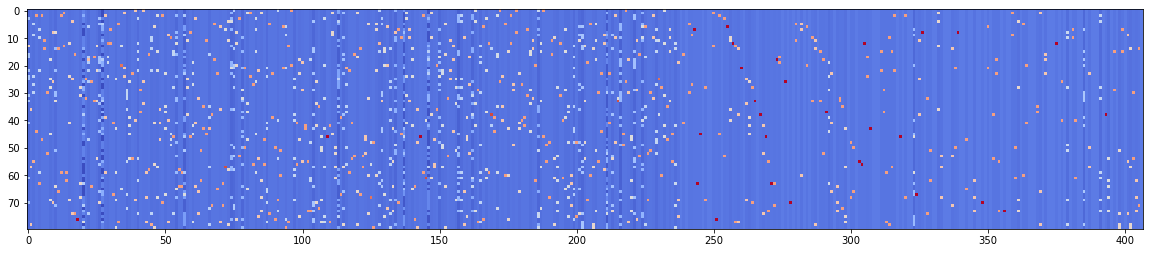

In [288]:
plt.figure(figsize=(20, 25))
plt.imshow(nor_doc_cooc_arr, cmap='coolwarm', interpolation='nearest')
plt.show()

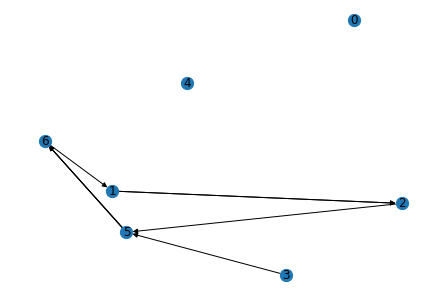

In [177]:
G2 = nx.MultiDiGraph()
G2.add_nodes_from([i for i in range(7)])
pos = nx.random_layout(G2)
G2.add_edge(1, 2)
#G2.edges[1, 2]['label'] = 0
G2.add_edge(1, 2)
#G2.edges[1, 2]['label'] = 1
G2.add_edge(2, 5)
#G2.edges[2, 5]['label'] = 0
G2.add_edge(3, 5)
#G2.edges[3,5]['label'] = 0
G2.add_edge(5, 6)
#G2.edges[5,6]['label'] = 1
G2.add_edge(5, 6)
#G2.edges[5,6]['label'] = 1
G2.add_edge(5, 6)
G2.add_edge(6, 1)
#G2.edges[6,1]['label'] = 1

nx.draw(G2, with_labels = True, pos = pos, node_size =150)

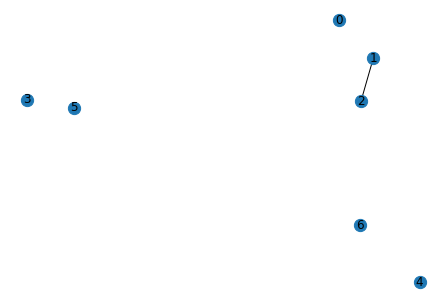

In [159]:
G2 = nx.MultiGraph()
G2.add_nodes_from([i for i in range(7)])
pos = nx.random_layout(G2)
G2.add_edge(1, 2)
nx.draw(G2, with_labels = True, pos = pos, node_size =150)

In [178]:
G2.edges

OutMultiEdgeView([(1, 2, 0), (1, 2, 1), (2, 5, 0), (3, 5, 0), (5, 6, 0), (5, 6, 1), (5, 6, 2), (6, 1, 0)])

In [179]:
G2.edges[1,2,0]

{}

In [172]:
G2.nodes()

NodeView(())

In [163]:
G2.edges[1, 2, 0]['lable'] = 1

In [180]:
width_dict = Counter(G2.edges())
width_dict

Counter({(1, 2): 2, (2, 5): 1, (3, 5): 1, (5, 6): 3, (6, 1): 1})

In [184]:
list(G2.edges())

[(1, 2), (1, 2), (2, 5), (3, 5), (5, 6), (5, 6), (5, 6), (6, 1)]

In [183]:
if (1, 2) in list(G2.edges()):
    print(1)
else:
    print(0)

1
